In [148]:
# indeed.com url
base_url = "http://www.indeed.co.uk/jobs?q=data+scientist&l=London&start={}"

In [149]:
import requests
from bs4 import BeautifulSoup
import urllib2
import pandas as pd
import re

In [150]:
pd.set_option('max_colwidth',5000)    # to remove column limit

In [151]:
r = urllib2.urlopen(base_url).read()
r = ''.join(r)
soup = BeautifulSoup(r, "lxml")

###### The objective of this project is to understand how to use vast amount of data available on internet and make use of that data to make sense out of it.
In this project, I am trying to scrape indeed.com and indeed.co.uk website to scrape the data from the web and use this unstrctured data to make predictions if a specific job will have salary more than the median or not.

## Only London data scraping

In [153]:
#url = base_url.format(i)
df = pd.DataFrame()
for i in range(1,1288,10):      # Number of pages plus one 
    #base_url = "http://www.indeed.co.uk/jobs?q=data+scientist&l=London&start={}"
    url = base_url.format(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "lxml")
    targetElements = soup.findAll('div', attrs={'class' : '  row  result'})

    for elem in targetElements:
        try:
            comp_name = elem.find('span', attrs={'itemprop':'name'}).getText().strip()
        except:
            pass
        try:
            job_title = elem.find('a', attrs={'class':'turnstileLink'}).attrs['title']
        except:
            pass
        try:
            job_link = "%s%s" % (url,elem.find('a').get('href'))
        except:
            pass
        try:
            job_addr = elem.find('span', attrs={'itemprop':'addressLocality'}).getText()
        except:
            pass
        try:
            job_posted = elem.find('span', attrs={'class': 'date'}).getText()
        except:
            pass
        try:
            job_location = elem.find('span', attrs={'itemprop': 'jobLocation'}).getText()
        except:
            pass
        try:
            description = elem.find('span', attrs={'itemprop' : 'description'}).getText()
        except:
            pass
        salary = elem.find('nobr')
        if salary != None:
            salary = salary.getText()
        df = df.append({'Comp_name': comp_name, 'Job_title': job_title, 'Job_link': job_link, 'Job_posted': job_posted,
               'Job_addr' :job_addr, 'Job_location': job_location, 'description': description, 'Salary' : salary
                          }, ignore_index=True)
df.head()

,Comp_name,Job_addr,Job_link,Job_location,Job_posted,Job_title,Salary,description
0,Streetbees,London,http://www.indeed.co.uk/jobs?q=data+scientist&l=London&start=1/rc/clk?jk=6162033faf5de846&fccid=3fddb77a8d36e08f,London,6 days ago,Data Scientist,None,"\nThe Opportunity – Data Scientist. We are looking for a Data Scientist that will help us discover the information hidden in the vast amounts of data we collect,..."
1,SWIFT,London,http://www.indeed.co.uk/jobs?q=data+scientist&l=London&start=1/cmp/Swift/jobs/Data-Analyst-d1e30685c0b64216?r=1&fccid=a3d9de619b5ce3a3,London,4 days ago,Data Analyst / Data Scientist,None,"\nCompliance Data Analyst*. Industry based data analysis experience. Although no specific programming language skills required, the candidate must have sufficient..."
2,Deutsche Bank,London,http://www.indeed.co.uk/jobs?q=data+scientist&l=London&start=1/rc/clk?jk=eaafeeeea9b6ea25&fccid=f1d8e147024abb3f,London,14 days ago,Data Scientists,None,"\nDemonstrated experience in analytics platforms (SAS, R etc) for data mining and statistical analysis. Performing proactive risk assessments utilising subject..."
3,33Six Consultancy,London,http://www.indeed.co.uk/jobs?q=data+scientist&l=London&start=1/cmp/33Six-Consultancy/jobs/Data-Scientist-0d9ea0cd69d66203?r=1&fccid=7ab6bc841571f8b9,London,5 days ago,Data Scientist,"£70,000 a year","\n(Big Data desirable i.e. AWS, Hadoop, MongoDB). The ideal candidate will have a hybrid background in Data Engineering and Data Science and be very hands on to..."
4,The Economist Group,London,http://www.indeed.co.uk/jobs?q=data+scientist&l=London&start=1/rc/clk?jk=b3eca9abb088ef24&fccid=4e4e192b0ebfcfeb,London,7 hours ago,Data Scientist,None,"\nCurrently, we are seeking a Data Scientist to help our Circulation Team make use of data in all aspects of their work...."


In [ ]:
sum(df.Salary.isnull()

In [ ]:
df.to_csv("Salary.csv", encoding="UTF-8", index=False)

##Data scraping for various cities in the USA

In [ ]:
url_template = "http://www.indeed.com/jobs?q=data+scientist&l={}&start={}"
max_results_per_city = 2500 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

df_US = pd.DataFrame()
for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami']):
    for start in range(1, max_results_per_city, 10):
        #base_url = "http://www.indeed.co.uk/jobs?q=data+scientist&l=London&start={}"
        url = url_template.format(city,start)
        r = requests.get(url, lxml)
        soup = BeautifulSoup(r.content)
        targetElements = soup.findAll('div', attrs={'class' : '  row  result'})
        for elem in targetElements:
            try:
                comp_name = elem.find('span', attrs={'itemprop':'name'}).getText().strip()
            except:
                pass
            try:
                job_title = elem.find('a', attrs={'class':'turnstileLink'}).attrs['title']
            except:
                pass
            try:
                job_link = "%s%s" % (url,elem.find('a').get('href'))
            except:
                pass
            try:
                job_addr = elem.find('span', attrs={'itemprop':'addressLocality'}).getText()
            except:
                pass
            try:
                job_posted = elem.find('span', attrs={'class': 'date'}).getText()
            except:
                pass
            try:
                job_location = elem.find('span', attrs={'itemprop': 'jobLocation'}).getText()
            except:
                pass
            try:
                description = elem.find('span', attrs={'itemprop' : 'description'}).getText()
            except:
                pass
            salary = elem.find('nobr')
            if salary != None:
                salary = salary.getText()
            df_US = df_US.append({'Comp_name': comp_name, 'Job_title': job_title, 'Job_link': job_link, 'Job_posted': job_posted,
                   'Job_addr' :job_addr, 'Job_location': job_location, 'description': description, 'Salary' : salary
                              }, ignore_index=True)

df_US.head()

In [ ]:
sum(df_US.Salary.isnull())

In [ ]:
df_US.to_csv("Salary_US.csv", encoding="UTF-8", index=False )

In [ ]:
df["Country"] = "UK"
df_US["Country"] = "USA"

In [ ]:
Combined_Salary = pd.concat([df, df_US], axis = 0)

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [3]:
df_US = pd.read_csv("Salary_US.csv")
df = pd.read_csv("Salary.csv")

In [4]:
df["Country"] = "UK"
df_US["Country"] = "USA"

In [5]:
Combined_Salary = pd.concat([df, df_US], axis = 0)
#Remove Job link as its showing the same job multiple times 
Combined_Salary = Combined_Salary.drop(["Job_link"],axis=1)
Combined_Salary.shape

(29518, 8)

In [6]:
Combined_Salary1 = Combined_Salary.drop_duplicates()

In [7]:
Combined_Salary1.shape

(3296, 8)

In [8]:
Combined_Salary1.head()

,Comp_name,Job_addr,Job_location,Job_posted,Job_title,Salary,description,Country
0,University of Westminster,Westminster,Westminster,17 days ago,Data Scientist - Machine Learning,"£32,000 - £40,000 a year","\nIt will bring together web analytics data, c...",UK
1,CIBC,London,London,14 days ago,Associate - Quant Analytics,NaN,\nThey will work in a small highly skilled tea...,UK
2,Digital Science,London N1,London N1,15 days ago,Data Scientist - Research,"£45,000 a year",\nProficiency with data processing and data ma...,UK
3,KPMG UK,London,London,6 days ago,Data Scientist - Data Engineering - TechSolutions,NaN,\nLeading and managing small teams of data sci...,UK
4,InMotion,London,London,10 days ago,"Data Scientist, Big Data Startup",NaN,\nData scientist in a Start-up. A detail orien...,UK


Started with 29518 rows of data in UK and USA. However, we have only 3296 observations without duplicates. This means, there is a job postings by various agencies, including the hiring company itself. On an average, it looks like 1 job is being advertised by 10 different agencies... 

In [9]:
Final_df = Combined_Salary1[Combined_Salary1.Salary.notnull()]

In [10]:
Final_df.shape

(371, 8)

After removing the jobs, which do not have any salary, I am left with only 371 observations... Oh.. wow.. thats like only 1% of the observations I had started with.. 

In [11]:
Final_df1 = Final_df.copy()
Final_df1.ix[(Final_df1.Salary.astype('str').str.contains('year')), "Job_segment"] = "Permanent"
Final_df1.ix[Final_df1["Job_segment"] != 'Permanent', "Job_segment"] = "Contract"

In [12]:
Final_df1.Job_segment.value_counts()

Permanent    293
Contract      78
Name: Job_segment, dtype: int64

In [13]:
# Getting salaries for employees on contract jobs.... 
# There are 78 contract jobs where pay frequency is not annually so I am creating features to get the exact salary 
# of employees working on a contract jobs

Final_df1.ix[(Final_df1.Salary.astype('str').str.contains('hour')), "Pay_frequency"] = "Hourly"
Final_df1.ix[(Final_df1.Salary.astype('str').str.contains('day')), "Pay_frequency"] = "Daily"
Final_df1.ix[(Final_df1.Salary.astype('str').str.contains('week')), "Pay_frequency"] = "Weekly"
Final_df1.ix[(Final_df1.Salary.astype('str').str.contains('month')), "Pay_frequency"] = "Monthly"
Final_df1.ix[(Final_df1.Salary.astype('str').str.contains('year')), "Pay_frequency"] = "Yearly"

In [14]:
Final_df1.head()

,Comp_name,Job_addr,Job_location,Job_posted,Job_title,Salary,description,Country,Job_segment,Pay_frequency
0,University of Westminster,Westminster,Westminster,17 days ago,Data Scientist - Machine Learning,"£32,000 - £40,000 a year","\nIt will bring together web analytics data, c...",UK,Permanent,Yearly
2,Digital Science,London N1,London N1,15 days ago,Data Scientist - Research,"£45,000 a year",\nProficiency with data processing and data ma...,UK,Permanent,Yearly
5,33Six Consultancy,London,London,2 days ago,Data Scientist,"£70,000 a year","\n(Big Data desirable i.e. AWS, Hadoop, MongoD...",UK,Permanent,Yearly
16,Kheiron,London,London,14 days ago,Machine Learning Engineer,"£100,000 a year",\nWe strongly encourage our scientists to publ...,UK,Permanent,Yearly
18,Bettor Believe,London,London,1 hour ago,"Quantitative Analyst, London - £70-110K plus b...","£70,000 - £110,000 a year",\nThe team manage and model sports betting dat...,UK,Permanent,Yearly


In [15]:
import re
# a function for using regex to extract salary amount
def extract_salary(Sal_string):
    return re.findall('(\d{0,3}\,\d{0,3})',Sal_string)

# apply extract_salary to all salaries
Final_df1['Salary']=Final_df1['Salary'].apply(extract_salary)
# remove commas in salaries
Final_df1['Salary']=[[i.replace(',','') for i in y] for y in Final_df1.Salary]

In [16]:
Final_df1.head()

,Comp_name,Job_addr,Job_location,Job_posted,Job_title,Salary,description,Country,Job_segment,Pay_frequency
0,University of Westminster,Westminster,Westminster,17 days ago,Data Scientist - Machine Learning,"[32000, 40000]","\nIt will bring together web analytics data, c...",UK,Permanent,Yearly
2,Digital Science,London N1,London N1,15 days ago,Data Scientist - Research,[45000],\nProficiency with data processing and data ma...,UK,Permanent,Yearly
5,33Six Consultancy,London,London,2 days ago,Data Scientist,[70000],"\n(Big Data desirable i.e. AWS, Hadoop, MongoD...",UK,Permanent,Yearly
16,Kheiron,London,London,14 days ago,Machine Learning Engineer,[100000],\nWe strongly encourage our scientists to publ...,UK,Permanent,Yearly
18,Bettor Believe,London,London,1 hour ago,"Quantitative Analyst, London - £70-110K plus b...","[70000, 110000]",\nThe team manage and model sports betting dat...,UK,Permanent,Yearly


It looks like the data for US and UK is in differnet format and finding one solution 
for data cleaning is a little difficult so I am going to separate the data for UK and the USA. 
Also UK data is very small so I will be building model only on the US data

In [17]:
Final_UK = Final_df1.loc[Final_df1.Country == "UK"]
print Final_UK.shape
Final_USA = Final_df1.loc[Final_df1.Country == "USA"]
print Final_USA.shape

(193, 10)
(178, 10)


In [18]:
USA1 = Final_USA.loc[~Final_USA.index.duplicated(keep='first')].reset_index()
print USA1.head()
USA2 = pd.DataFrame(USA1.Job_addr.str.split(',').tolist(),columns = ['Job_City','Job_State'])
print USA2.head()
USA3 =USA1.join(USA2)
USA3.head(5)

   index                   Comp_name     Job_addr Job_location    Job_posted  \
0      6           SearchBankingJobs  Houston, TX  Houston, TX   22 days ago   
1     20  Baylor College of Medicine  Houston, TX  Houston, TX  30+ days ago   
2     26  Baylor College of Medicine  Houston, TX  Houston, TX   29 days ago   
3     40  Baylor College of Medicine  Houston, TX  Houston, TX  30+ days ago   
4     74              Selby Jennings  Houston, TX  Houston, TX  30+ days ago   

                            Job_title            Salary  \
0           Quantitative Risk Analyst  [150000, 205000]   
1      Lead Bioinformatics Programmer   [83000, 102000]   
2       Research Financial Analyst II           [65000]   
3       Sr. Bioinformatics Programmer    [70000, 91000]   
4  Senior Predictive Modeling Actuary   [70000, 130000]   

                                         description Country Job_segment  \
0  \nLead the review and care of relevant model a...     USA   Permanent   
1  \nPM, LIM

,index,Comp_name,Job_addr,Job_location,Job_posted,Job_title,Salary,description,Country,Job_segment,Pay_frequency,Job_City,Job_State
0,6,SearchBankingJobs,"Houston, TX","Houston, TX",22 days ago,Quantitative Risk Analyst,"[150000, 205000]",\nLead the review and care of relevant model a...,USA,Permanent,Yearly,Houston,TX
1,20,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Lead Bioinformatics Programmer,"[83000, 102000]","\nPM, LIMS, QC, IT, Clinical feature requests....",USA,Permanent,Yearly,Houston,TX
2,26,Baylor College of Medicine,"Houston, TX","Houston, TX",29 days ago,Research Financial Analyst II,[65000],\nUsing data from Principal Investigators and ...,USA,Permanent,Yearly,Houston,TX
3,40,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Sr. Bioinformatics Programmer,"[70000, 91000]",\n3 years’ experience in scientific programmin...,USA,Permanent,Yearly,Houston,TX
4,74,Selby Jennings,"Houston, TX","Houston, TX",30+ days ago,Senior Predictive Modeling Actuary,"[70000, 130000]",\nSenior Predictive Modeler A leading global i...,USA,Permanent,Yearly,Houston,TX


In [19]:
USA1 = USA3.loc[~USA3.index.duplicated(keep='first')].reset_index()
Sal = pd.DataFrame(USA3.Salary.tolist(), columns=['Min_Salary', 'Max_Salary'])
USA4 =USA3.join(Sal)
USA4.head()

,index,Comp_name,Job_addr,Job_location,Job_posted,Job_title,Salary,description,Country,Job_segment,Pay_frequency,Job_City,Job_State,Min_Salary,Max_Salary
0,6,SearchBankingJobs,"Houston, TX","Houston, TX",22 days ago,Quantitative Risk Analyst,"[150000, 205000]",\nLead the review and care of relevant model a...,USA,Permanent,Yearly,Houston,TX,150000,205000
1,20,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Lead Bioinformatics Programmer,"[83000, 102000]","\nPM, LIMS, QC, IT, Clinical feature requests....",USA,Permanent,Yearly,Houston,TX,83000,102000
2,26,Baylor College of Medicine,"Houston, TX","Houston, TX",29 days ago,Research Financial Analyst II,[65000],\nUsing data from Principal Investigators and ...,USA,Permanent,Yearly,Houston,TX,65000,None
3,40,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Sr. Bioinformatics Programmer,"[70000, 91000]",\n3 years’ experience in scientific programmin...,USA,Permanent,Yearly,Houston,TX,70000,91000
4,74,Selby Jennings,"Houston, TX","Houston, TX",30+ days ago,Senior Predictive Modeling Actuary,"[70000, 130000]",\nSenior Predictive Modeler A leading global i...,USA,Permanent,Yearly,Houston,TX,70000,130000


In [20]:
USA4["Min_Salary"] = USA4["Min_Salary"].astype("float")
USA4["Max_Salary"] = USA4["Max_Salary"].astype("float")
#print USA4.dtypes
# Replace missing values with 0
USA4.Max_Salary = USA4.Max_Salary.fillna(0)
USA4.Min_Salary = USA4.Min_Salary.fillna(0)

In [21]:
import numpy as np
mask = USA4["Max_Salary"] == 0
USA4['Salary_New'] = np.where(mask, USA4.Min_Salary, USA4.Min_Salary + (USA4.Max_Salary - USA4.Min_Salary) / float(2))
USA4.head()

,index,Comp_name,Job_addr,Job_location,Job_posted,Job_title,Salary,description,Country,Job_segment,Pay_frequency,Job_City,Job_State,Min_Salary,Max_Salary,Salary_New
0,6,SearchBankingJobs,"Houston, TX","Houston, TX",22 days ago,Quantitative Risk Analyst,"[150000, 205000]",\nLead the review and care of relevant model a...,USA,Permanent,Yearly,Houston,TX,150000.0,205000.0,177500.0
1,20,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Lead Bioinformatics Programmer,"[83000, 102000]","\nPM, LIMS, QC, IT, Clinical feature requests....",USA,Permanent,Yearly,Houston,TX,83000.0,102000.0,92500.0
2,26,Baylor College of Medicine,"Houston, TX","Houston, TX",29 days ago,Research Financial Analyst II,[65000],\nUsing data from Principal Investigators and ...,USA,Permanent,Yearly,Houston,TX,65000.0,0.0,65000.0
3,40,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Sr. Bioinformatics Programmer,"[70000, 91000]",\n3 years’ experience in scientific programmin...,USA,Permanent,Yearly,Houston,TX,70000.0,91000.0,80500.0
4,74,Selby Jennings,"Houston, TX","Houston, TX",30+ days ago,Senior Predictive Modeling Actuary,"[70000, 130000]",\nSenior Predictive Modeler A leading global i...,USA,Permanent,Yearly,Houston,TX,70000.0,130000.0,100000.0


1. There are still some jobs with missing salary. We need to exclude those observations as well

In [22]:
USA4.loc[USA4.Min_Salary > 0]
USA4.head()

,index,Comp_name,Job_addr,Job_location,Job_posted,Job_title,Salary,description,Country,Job_segment,Pay_frequency,Job_City,Job_State,Min_Salary,Max_Salary,Salary_New
0,6,SearchBankingJobs,"Houston, TX","Houston, TX",22 days ago,Quantitative Risk Analyst,"[150000, 205000]",\nLead the review and care of relevant model a...,USA,Permanent,Yearly,Houston,TX,150000.0,205000.0,177500.0
1,20,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Lead Bioinformatics Programmer,"[83000, 102000]","\nPM, LIMS, QC, IT, Clinical feature requests....",USA,Permanent,Yearly,Houston,TX,83000.0,102000.0,92500.0
2,26,Baylor College of Medicine,"Houston, TX","Houston, TX",29 days ago,Research Financial Analyst II,[65000],\nUsing data from Principal Investigators and ...,USA,Permanent,Yearly,Houston,TX,65000.0,0.0,65000.0
3,40,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Sr. Bioinformatics Programmer,"[70000, 91000]",\n3 years’ experience in scientific programmin...,USA,Permanent,Yearly,Houston,TX,70000.0,91000.0,80500.0
4,74,Selby Jennings,"Houston, TX","Houston, TX",30+ days ago,Senior Predictive Modeling Actuary,"[70000, 130000]",\nSenior Predictive Modeler A leading global i...,USA,Permanent,Yearly,Houston,TX,70000.0,130000.0,100000.0


1. Assuming a candiate who is being paid once a month, will have work for 11 months and hence annual salary will be 11 times the monthly salary
2. Assuming a candiate who is being paid once a day, will have work for 220 days and hence annual salary will be 220 times the daily salary
3. Assuming a candiate who is being paid once a week, will have work for 48 weeks and hence annual salary will be 48 times the weekly salary
4. Assuming a candiate who is being paid for each hour, will have work 6000 hours and hence annual salary will be 6000 times the hourly salary

In [23]:
mask_yearly = USA4.Pay_frequency == 'Yearly'
mask_monthly = USA4.Pay_frequency == 'Monthly'
mask_weekly = USA4.Pay_frequency == 'Weekly'
mask_daily = USA4.Pay_frequency == 'Daily'
mask_hourly = USA4.Pay_frequency == 'Hourly'

USA4['Salary_New'] = np.where(mask_monthly, (USA4.Salary_New) * 11, USA4.Salary_New)
USA4['Salary_New'] = np.where(mask_weekly, USA4.Salary_New * 48, USA4.Salary_New)
USA4['Salary_New'] = np.where(mask_daily, USA4.Salary_New * 220, USA4.Salary_New)
USA4['Salary_New'] = np.where(mask_hourly, USA4.Salary_New * 6000, USA4.Salary_New)

In [24]:
USA4['Salary_New'].isnull().sum()

0

No more missing values in salary

In [25]:
USA4.Job_State.value_counts().head()

 NY    34
 CA    27
 TX    25
 WA    20
 IL    14
Name: Job_State, dtype: int64

In [26]:
USA4['Job_State'] = USA4['Job_State'].str[:3]

In [27]:
USA4.Job_State.value_counts()

 NY    39
 CA    32
 TX    27
 WA    21
 IL    17
 PA    12
 GA     8
 FL     7
 AZ     7
 CO     5
 NJ     2
 OR     1
Name: Job_State, dtype: int64

[<matplotlib.text.Text at 0x123009250>, <matplotlib.text.Text at 0x1231376d0>]

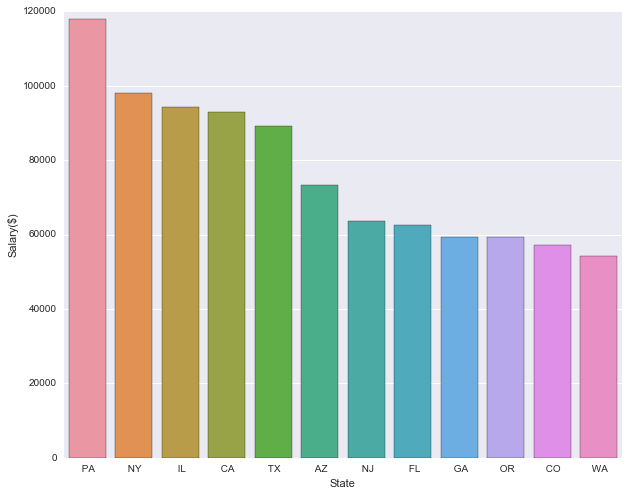

In [44]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

#grouping salary by city to find average salary of each city
StateGroup=USA4.groupby(['Job_State'])['Salary_New'].mean()
StateGroup.sort_values(ascending=False, inplace=True)

plt.rcParams['figure.figsize']=(10,8)
fig = sns.barplot(x=StateGroup.index, y=StateGroup.values)
fig.set(xlabel = 'State', ylabel ='Salary($)')

[<matplotlib.text.Text at 0x11ee11890>, <matplotlib.text.Text at 0x11f00f250>]

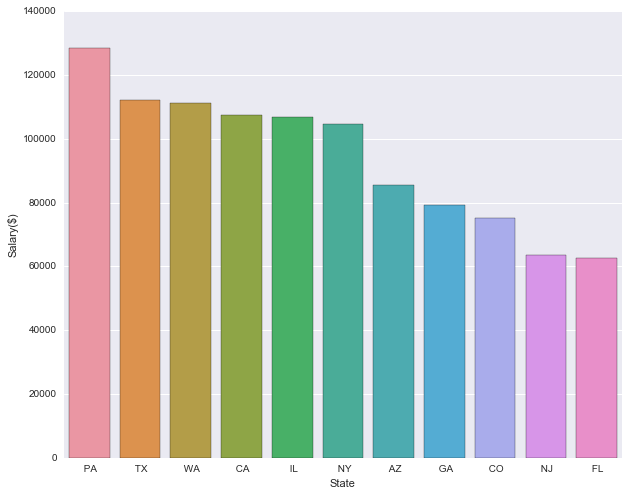

In [41]:
#grouping salary by city to find average salary of each city for Permanent Jobs
PermJobs = USA4[USA4.Job_segment == 'Permanent']
PermJobs.head()

StatePermGroup=PermJobs.groupby(['Job_State'])['Salary_New'].mean()

StatePermGroup.sort_values(ascending=False, inplace=True)

plt.rcParams['figure.figsize']=(10,8)
fig = sns.barplot(x=StatePermGroup.index, y=StatePermGroup.values)
fig.set(xlabel = 'State', ylabel ='Salary($)')


[<matplotlib.text.Text at 0x11fd3fa50>, <matplotlib.text.Text at 0x11ee10350>]

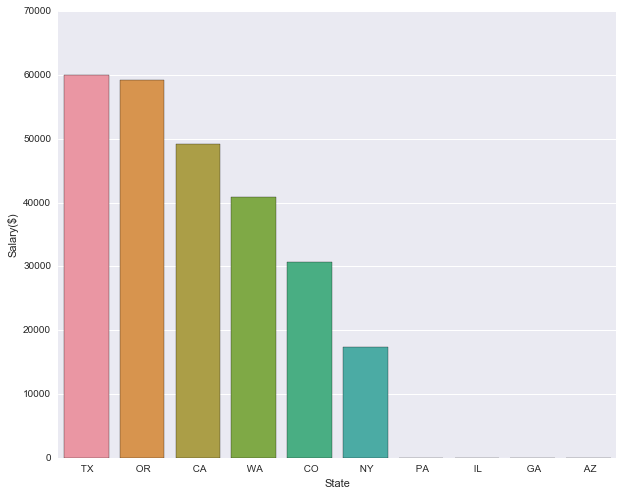

In [42]:

#grouping salary by city to find average salary of each city for Contract Jobs
ContJobs = USA4[USA4.Job_segment == 'Contract']
ContJobs.head()

ContJobsGroup=ContJobs.groupby(['Job_State'])['Salary_New'].mean()
ContJobsGroup.sort_values(ascending=False, inplace=True)

plt.rcParams['figure.figsize']=(10,8)
fig = sns.barplot(x=ContJobsGroup.index, y=ContJobsGroup.values)
fig.set(xlabel = 'State', ylabel ='Salary($)')

There is significant difference between contract job salary and permanent job salary by state

In [45]:
print USA4.Salary_New.median()

78242.75


In [46]:
def Sal_seg(x):
    if x > USA4.Salary_New.median():
        return 1
    else:
        return 0
USA4.Sal_seg = USA4.Salary_New.apply(Sal_seg)

In [47]:
USA4.Sal_seg.value_counts()

1    89
0    89
Name: Salary_New, dtype: int64

In [48]:
# Top 10 companies recruting for data science jobs in USA
USA4.Comp_name.value_counts().head(10)

Workbridge Associates                               16
University of Texas at Austin                        9
University of Washington Medical Center              9
University of Washington                             7
DEPT OF HEALTH/MENTAL HYGIENE                        6
Jobspring Partners                                   5
Selby Jennings                                       5
Los Angeles County Department of Human Resources     5
ADMIN FOR CHILDREN'S SVCS                            4
University of Miami                                  4
Name: Comp_name, dtype: int64

Since there are not many companies hiring for data science jobs regularly, it doesn't look 
like company name will add more value to the predictive model. So I am going to ignore this variable 

Create dummy states to see, if the saleries differ for various states

In [140]:
State_dummies = pd.get_dummies(USA4['Job_State'], prefix='State', drop_first=True)
USA5=pd.concat([USA4,State_dummies], axis=1)
USA5.head()

,index,Comp_name,Job_addr,Job_location,Job_posted,Job_title,Salary,description,Country,Job_segment,...,State_ CO,State_ FL,State_ GA,State_ IL,State_ NJ,State_ NY,State_ OR,State_ PA,State_ TX,State_ WA
0,6,SearchBankingJobs,"Houston, TX","Houston, TX",22 days ago,Quantitative Risk Analyst,"[150000, 205000]",\nLead the review and care of relevant model a...,USA,Permanent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Lead Bioinformatics Programmer,"[83000, 102000]","\nPM, LIMS, QC, IT, Clinical feature requests....",USA,Permanent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,26,Baylor College of Medicine,"Houston, TX","Houston, TX",29 days ago,Research Financial Analyst II,[65000],\nUsing data from Principal Investigators and ...,USA,Permanent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Sr. Bioinformatics Programmer,"[70000, 91000]",\n3 years’ experience in scientific programmin...,USA,Permanent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,74,Selby Jennings,"Houston, TX","Houston, TX",30+ days ago,Senior Predictive Modeling Actuary,"[70000, 130000]",\nSenior Predictive Modeler A leading global i...,USA,Permanent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
#Create a variable called Job segment to see if the salaries differ for contract jobs vs permanent jobs

In [51]:
USA5.Job_segment.replace({"Permanent" : 1, "Contract":0}, inplace=True)
USA5.head()

,index,Comp_name,Job_addr,Job_location,Job_posted,Job_title,Salary,description,Country,Job_segment,...,State_ CO,State_ FL,State_ GA,State_ IL,State_ NJ,State_ NY,State_ OR,State_ PA,State_ TX,State_ WA
0,6,SearchBankingJobs,"Houston, TX","Houston, TX",22 days ago,Quantitative Risk Analyst,"[150000, 205000]",\nLead the review and care of relevant model a...,USA,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Lead Bioinformatics Programmer,"[83000, 102000]","\nPM, LIMS, QC, IT, Clinical feature requests....",USA,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,26,Baylor College of Medicine,"Houston, TX","Houston, TX",29 days ago,Research Financial Analyst II,[65000],\nUsing data from Principal Investigators and ...,USA,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Sr. Bioinformatics Programmer,"[70000, 91000]",\n3 years’ experience in scientific programmin...,USA,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,74,Selby Jennings,"Houston, TX","Houston, TX",30+ days ago,Senior Predictive Modeling Actuary,"[70000, 130000]",\nSenior Predictive Modeler A leading global i...,USA,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Extrcat features based on job title 

In [52]:
# Extract features from Job Title
USA5.Job_title.value_counts().head()

Data Scientist                   6
Research Analyst                 3
END DEVICE SUPPORT SPECIALIST    2
Quantitative Analyst             2
Tester Tech                      2
Name: Job_title, dtype: int64

In [112]:
# Feature extraction from Job Title
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(
    ngram_range=[1,2],
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=30, # Only use the top 50 most common words
)

# This builds a matrix with a row per website (or data point) and column per word (using all words in the dataset)
feat = v.fit_transform(USA5.Job_title).todense()
feat = pd.DataFrame(feat, columns=v.get_feature_names())
feat.head()
print feat.columns

Index([u'analyst', u'associate', u'big', u'big data', u'clinical',
       u'coordinator', u'data', u'data scientist', u'developer', u'director',
       u'engineer', u'engineering', u'engineering scientist', u'health', u'ii',
       u'laboratory', u'laboratory scientist', u'lead', u'learning',
       u'machine', u'machine learning', u'quantitative', u'research',
       u'research analyst', u'scientist', u'senior', u'software',
       u'software engineer', u'specialist', u'statistical'],
      dtype='object')


In [84]:
USA6 = pd.concat([USA5, X], axis =1)

In [107]:
USA6.head(2)

,index,Comp_name,Job_addr,Job_location,Job_posted,Job_title,Salary,description,Country,Job_segment,...,senior,software engineer,specialist,statistical,Engineer,Medical,Junior,Senior,Data_science,target
0,6,SearchBankingJobs,"Houston, TX","Houston, TX",22 days ago,Quantitative Risk Analyst,"[150000, 205000]",\nLead the review and care of relevant model a...,USA,1,...,0,0,0,0,0,0,1,0,1,True
1,20,Baylor College of Medicine,"Houston, TX","Houston, TX",30+ days ago,Lead Bioinformatics Programmer,"[83000, 102000]","\nPM, LIMS, QC, IT, Clinical feature requests....",USA,1,...,0,0,0,0,0,0,0,1,0,True


In [109]:
USA6["Job_segment"] = USA6.Job_segment.replace({"Permanent" : 1, "Contract" : 0})
USA6["Job_segment"].value_counts()

1    129
0     49
Name: Job_segment, dtype: int64

In [97]:
USA6["target"] = USA6.Salary_New >= USA6.Salary_New.median()

In [98]:
USA6.target.value_counts()
USA6.columns

Index([                u'index',             u'Comp_name',
                    u'Job_addr',          u'Job_location',
                  u'Job_posted',             u'Job_title',
                      u'Salary',           u'description',
                     u'Country',           u'Job_segment',
               u'Pay_frequency',              u'Job_City',
                   u'Job_State',            u'Min_Salary',
                  u'Max_Salary',            u'Salary_New',
                   u'State_ CA',             u'State_ CO',
                   u'State_ FL',             u'State_ GA',
                   u'State_ IL',             u'State_ NJ',
                   u'State_ NY',             u'State_ OR',
                   u'State_ PA',             u'State_ TX',
                   u'State_ WA',               u'analyst',
                   u'associate',              u'big data',
                    u'clinical',           u'coordinator',
              u'data scientist',             u'developer

In [99]:
X=USA6[['Job_segment','State_ NY','State_ PA', 'State_ IL','State_ CA','associate', 'big data',
       'data scientist', 'developer','director', 'machine learning', 'research', 'senior', 'statistical']]
y = USA6.target

In [118]:
import statsmodels.formula.api as smf

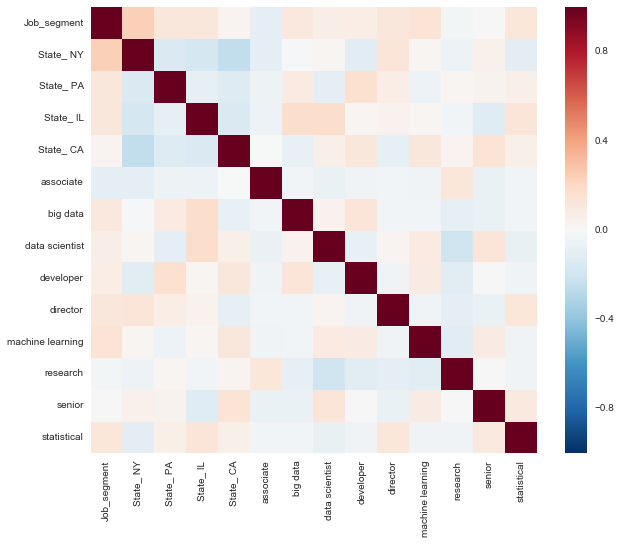

In [119]:
sns.heatmap(X.corr())

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [121]:
smf.Logit(y, X).fit().summary()

         Current function value: 0.520801
         Iterations: 35


/Users/ipm/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Salary_New   No. Observations:                  178
Model:                          Logit   Df Residuals:                      164
Method:                           MLE   Df Model:                           13
Date:                Mon, 07 Nov 2016   Pseudo R-squ.:                  0.2486
Time:                        22:46:46   Log-Likelihood:                -92.703
converged:                      False   LL-Null:                       -123.38
                                        LLR p-value:                 3.003e-08
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Job_segment          0.8696      0.344      2.526      0.012         0.195     1.544
State_ NY           -0.6402      0.474     -1.350      0.177        -1.570     0.290
State_ PA            0.4726      0.804      0.588      0.557        -1.103     2.048
State_ IL            0.7622      0.769      0.992      0.321        -0.744     2.269
State_ CA           -0.4896      0.517     -0.947      0.344        -1.503     0.524
associate          -30.5619   1.77e+06  -1.73e-05      1.000     -3.47e+06  3.47e+06
big data            21.3971   3.86e+04      0.001      1.000     -7.55e+04  7.56e+04
data scientist       1.0577      0.696      1.520      0.128        -0.306     2.421
developer           20.5372   1.67e+04      0.001      0.999     -3.27e+04  3.28e+04
director            -0.0784      0.947     -0.083      0.934        -1.934     1.777
machine learning    21.3717   2.51e+04      0.001      0.999     -4.92e+04  4.92e+04
research            -1.3517      0.429     -3.148      0.002        -2.193    -0.510
senior               0.5721      0.581      0.984      0.325        -0.568     1.712
statistical         -0.6836      0.892     -0.766      0.443        -2.432     1.064
====================================================================================
"""

Job segment which indicates if the job was a contract job or permanent job, seems to be significant.
None of the other variables are significant

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
lm = LogisticRegression(penalty='l2', C=0.0001)
scores = cross_val_score(lm, X, y)
print "Accuracy:" , scores.mean()

Accuracy: 0.665134099617


In [105]:
lm1 = LogisticRegression(penalty='l1', C=.1)
scores1 = cross_val_score(lm1, X, y)
print "Accuracy:" , scores1.mean()

Accuracy: 0.605555555556


The accuracy of Lasso is 66% and is better than Ridge. However, the number of observations are very low in the analaysis
So the conclusion of the model that salary is only driven by Job segment might not be correct. 

We need more data to validate the conclusions of the model

In [113]:
# Drop certain variables as they are quite similar to some others, so manually selecting the variables 
feat.drop(["ii", "data", "learning","machine", "software","big"], axis =1, inplace=True)

In [114]:
feat1 = pd.DataFrame()
feat1["Engineer"] = feat[["engineering","engineering scientist","engineer"]].max(axis=1)
feat1["Medical"] = feat[["laboratory scientist","health","laboratory","clinical"]].max(axis=1)
feat1["Junior"] = feat[["analyst","associate","coordinator","developer","software engineer"]].max(axis=1)
feat1["Senior"] = feat[["specialist","statistical","senior","scientist","lead","director"]].max(axis=1)
feat1["Data_science"] = feat[["big data","data scientist","machine learning","quantitative","research", "research analyst"]].max(axis=1)

In [144]:
New_X = pd.concat([feat1, pd.DataFrame(USA6["Job_segment"])], axis=1)
print New_X.head()

   Engineer  Medical  Junior  Senior  Data_science  Job_segment
0         0        0       1       0             1            1
1         0        0       0       1             0            1
2         0        0       1       0             1            1
3         0        0       0       0             0            1
4         0        0       0       1             0            1


In [145]:
X_train, X_test, y_train, y_test = train_test_split(New_X,y, test_size=0.2, random_state=10)

In [146]:
smf.Logit(y, New_X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.607585
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Salary_New   No. Observations:                  178
Model:                          Logit   Df Residuals:                      172
Method:                           MLE   Df Model:                            5
Date:                Mon, 07 Nov 2016   Pseudo R-squ.:                  0.1234
Time:                        22:55:30   Log-Likelihood:                -108.15
converged:                       True   LL-Null:                       -123.38
                                        LLR p-value:                 1.197e-05
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Engineer         1.4466      0.611      2.369      0.018         0.250     2.643
Medical         -0.5360      0.564     -0.950      0.342        -1.641     0.570
Junior          -0.9605      0.362     -2.657      0.008        -1.669    -0.252
Senior          -0.7243      0.308     -2.350      0.019        -1.328    -0.120
Data_science     0.1087      0.356      0.305      0.760        -0.590     0.807
Job_segment      1.2703      0.304      4.174      0.000         0.674     1.867
================================================================================
"""

In [135]:
lm = LogisticRegression(penalty='l2', C=0.00001)
scores = cross_val_score(lm, New_X, y)
print "Accuracy:" , scores.mean()

Accuracy: 0.590229885057


In [136]:
lm1 = LogisticRegression(penalty='l1', C=.0001)
scores1 = cross_val_score(lm1, New_X, y)
print "Accuracy:" , scores1.mean()

Accuracy: 0.5


If I leave the state out, the predictions are better. 
The Variable Data science suggest that the job title has data science, scientist, data scientist, research in the title, however the logistic regression suggests that this variable is insignificant, as p value is very high

It looks like Job segment is the most significant variable in predicting if the job will hve salary more than 50K. Junior and senior job titles seem to be negatively coreleted for preficting the, if the employee will have high salary

Logistic regression is performing a bit better here. However since the sample size is too low, the results can be checked with caustion.

